#  Exercícios
___

O exercícios abaixo deverá ser feito individualmente. Para solucionar os problemas apresentados serão necessários conhecimentos em python, pandas, numpy, para as questões bônus matplotlib e scikit-learn. Segue documentação de cada uma dessas bibliotecas:

> python 3.8: https://docs.python.org/3/

> numpy:https://numpy.org/

> pandas: https://pandas.pydata.org/

> matplotlib: https://matplotlib.org/index.html

> scikit-learn: https://scikit-learn.org/stable/index.html

O intuito deste exercícios é solidificar o conhecimento nas bibliotecas e ferramentas utilizadas para análise de dados com python. Além disso, demonstrar uma situação próxima a do dia-a-dia de um cientista de dados.

## Case
___

Você um cientista de dados e acabou de ser contratado pela OitavoAndar, uma startup do setor imobiliário focada em alugueis fáceis e rápidos para o cliente final. Em 2019 a OitavoAndar foi avaliada em mais de um bilhão de reais e hoje é um dos principais canais de aluguel de imóveis no país.

Você, como cientista de dados, recebeu o desafio extrair insights para algumas áreas da empresa utilizando os dados disponíveis. Seu chefe te entrou um arquivo .csv descrevendo as seguintes features de imóveis para aluguel:

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms : Numero de quartos/ Quantity of rooms
- bathroom : Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa : Valor do condominio / Homeowners association tax
- rent amount : Valor do Aluguel / Rent amount
- total : Valor total / Total
- property tax : IPTU / Property tax
- fire insurance : Seguro Incendio / Fire Insurance

## Desafio
___

Seu chefe te mostra um board kanban com as seguintes demandas:

![kanban board](oitavo.png)

Cada uma das atividades na coluna ToDo deverão ser feitas em seções diferentes do mesmo jupyter notebook, cada uma deve conter uma célula markdown descrevendo os achados e conclusão. Recomenda-se também que seja criada uma seção específica para tratamento dos dados (imputação de valores nulos, adequação de tipos de dados, remoção de caracteres especiais). Seu chefe indicou que ao final você deverá fazer uma apresentação dos seus resultados a alta gestão da empresa. Lembre-se de usar gráficos,imagens e técnicas de storytelling com dados para criar sua apresentação.

A atividade que envolve a criação de um modelo para predição do valor do aluguel é uma atividade bônus e não obrigatória.

## Preparação dos dados
___

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [2]:
df = pd.read_csv('data/houses_to_rent.csv',sep=';')

In [3]:
df.iloc[5627,:]

Unnamed: 0             5627
city                      1
area                     93
rooms                     3
bathroom                  3
parking spaces            0
floor                    16
animal            not acept
furniture         furnished
hoa                 R$1,221
rent amount         R$5,100
property tax      R$366,300
fire insurance         R$65
total             R$372,700
Name: 5627, dtype: object

In [4]:
print(df.shape)
df.head()

(6080, 14)


,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0.0,1.0,240.0,3.0,3.0,4.0,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1.0,0.0,64.0,2.0,1.0,1.0,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2.0,1.0,443.0,5.0,5.0,4.0,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3.0,1.0,73.0,2.0,2.0,1.0,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.isna().sum()

city              11
area              11
rooms             11
bathroom          11
parking spaces    11
floor             11
animal            11
furniture          0
hoa               25
rent amount        0
property tax       9
fire insurance     8
total             42
dtype: int64

In [9]:
def remove_cifrao(value):
    try:
        return value.strip('R$')
    except:
        return value
    
def remove_ponto(value):
    try:
        return value.replace(',','')
    except:
        return value
    
def convert_float(value):
    try:
        return float(value)
    except:
        return np.nan

In [11]:
ls = ['hoa','rent amount','property tax','fire insurance','total']

for coluna in ls:
    df[coluna] = df[coluna].apply(remove_cifrao)
    df[coluna] = df[coluna].apply(remove_ponto)
    df[coluna] = df[coluna].apply(convert_float)
    
df['floor'] = df.floor.replace('-',0)
df['floor'] = df.floor.astype('float',errors='ignore')

df.dropna(subset=['total'],inplace=True)

In [12]:
categorical_features = ['city','animal']
numerical_features = ['area','rooms','bathroom','parking spaces','floor','hoa','property tax','fire insurance']

for cat in categorical_features:
    df[cat].fillna(value=df[cat].mode()[0],inplace=True)
    
for num in numerical_features:
    df[num].fillna(value=df[num].mean(),inplace=True)

In [13]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1.0,240.000000,3.000000,3.000000,4.000000,0.000000,acept,furnished,0.0,8000.0,1000.0,121.0,9121.0
1,0.0,64.000000,2.000000,1.000000,1.000000,10.000000,acept,not furnished,540.0,820.0,122.0,11.0,1493.0
2,1.0,443.000000,5.000000,5.000000,4.000000,3.000000,acept,furnished,4172.0,7000.0,1417.0,89.0,12680.0
3,1.0,73.000000,2.000000,2.000000,1.000000,12.000000,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0
4,1.0,151.430065,2.494276,2.343952,1.757591,5.669653,acept,not furnished,0.0,1200.0,41.0,16.0,1257.0


In [14]:
df.isna().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [22]:






list(zip(np.where(np.abs(stats.zscore(df[numerical_features])) > 3)[0],np.where(np.abs(stats.zscore(df[numerical_features])) > 3)[1]))

[(16, 3),
 (44, 3),
 (63, 1),
 (95, 1),
 (113, 1),
 (127, 1),
 (139, 1),
 (156, 7),
 (209, 2),
 (237, 3),
 (237, 7),
 (241, 4),
 (260, 7),
 (273, 3),
 (295, 7),
 (304, 2),
 (337, 4),
 (339, 7),
 (370, 3),
 (401, 7),
 (410, 3),
 (428, 3),
 (431, 3),
 (431, 4),
 (459, 2),
 (459, 7),
 (460, 2),
 (492, 7),
 (535, 1),
 (568, 7),
 (574, 1),
 (574, 2),
 (591, 4),
 (619, 2),
 (642, 2),
 (658, 4),
 (670, 3),
 (687, 2),
 (687, 3),
 (687, 7),
 (689, 4),
 (705, 3),
 (708, 3),
 (723, 1),
 (723, 2),
 (723, 3),
 (723, 7),
 (726, 7),
 (775, 3),
 (775, 7),
 (787, 3),
 (787, 7),
 (795, 4),
 (796, 4),
 (805, 4),
 (829, 2),
 (829, 3),
 (840, 4),
 (896, 4),
 (907, 3),
 (961, 3),
 (976, 2),
 (976, 7),
 (996, 3),
 (1022, 7),
 (1025, 4),
 (1026, 4),
 (1093, 4),
 (1116, 4),
 (1186, 4),
 (1191, 2),
 (1191, 3),
 (1196, 7),
 (1221, 3),
 (1233, 1),
 (1260, 5),
 (1277, 3),
 (1295, 4),
 (1307, 4),
 (1363, 4),
 (1394, 7),
 (1397, 1),
 (1397, 3),
 (1399, 2),
 (1399, 3),
 (1415, 1),
 (1417, 1),
 (1417, 2),
 (1417, 3),


## Análise dos dados
___

> Analisar a variação do valor total do aluguel dos imóveis com e sem mobília.

In [83]:
df[['furniture','total']].groupby('furniture',as_index=False).mean()

,furniture,total
0,furnished,7470.32338
1,not furnished,5535.27733


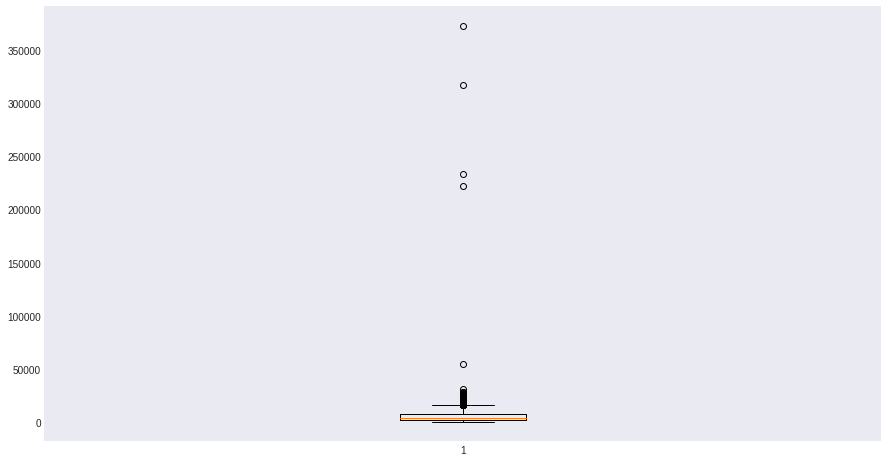

In [87]:
data = df[['furniture','total']]

fig = plt.figure(figsize=(15,8))
plt.boxplot(data['total'])

plt.show()

In [88]:
df[df['total'] == df.total.max()]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
5627,1.0,93.0,3.0,3.0,0.0,16.0,not acept,furnished,1221.0,5100.0,366300.0,65.0,372700.0
